# Sklearn

#### Importando Bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

### Modelos de Classificação

In [3]:
credito = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/credit.csv') 
credito.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [5]:
labelencoder = LabelEncoder()                                   #Para mudar as variáveis categóricas para numéricas;
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])
previsores[0]

array([1, 6, 0, 7, 1169, 4, 3, 4, 3, 2, 4, 2, 67, 1, 1, 2, 0, 1, 1, 1],
      dtype=object)

In [6]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3, random_state = 0)
# o x_treinamento recebe os valores dos atributos dos previsores, e o x_teste dos restantes, o y_treinamento recebe 
# a classe dos previsores e o y_teste a classe dos restantes;

##### Método de Naive Bayes

In [7]:
naive_bayes = GaussianNB()                      # Gera a tabela de probabilidadedos sim e não, porém, não é possível visualizar a tabela;
naive_bayes.fit(x_treinamento, y_treinamento)   

GaussianNB()

In [8]:
previsoes = naive_bayes.predict(x_teste)        # Ajusta o modelo para o banco de teste;
previsoes

array(['mangement self-employed', 'unskilled resident',
       'skilled employee', 'skilled employee', 'mangement self-employed',
       'skilled employee', 'skilled employee', 'skilled employee',
       'skilled employee', 'skilled employee', 'skilled employee',
       'skilled employee', 'mangement self-employed', 'skilled employee',
       'skilled employee', 'unskilled resident',
       'unemployed non-resident', 'mangement self-employed',
       'skilled employee', 'skilled employee', 'skilled employee',
       'skilled employee', 'mangement self-employed', 'skilled employee',
       'skilled employee', 'skilled employee', 'skilled employee',
       'skilled employee', 'skilled employee', 'skilled employee',
       'skilled employee', 'skilled employee', 'skilled employee',
       'unskilled resident', 'skilled employee', 'skilled employee',
       'skilled employee', 'skilled employee', 'skilled employee',
       'skilled employee', 'skilled employee', 'skilled employee',
       

In [9]:
confusao = confusion_matrix(y_teste, previsoes) # Mostrando erros e acertos da Previsão
confusao

array([[ 21,  25,   1,   1],
       [ 22, 142,   3,  16],
       [  2,   2,   0,   1],
       [  1,  41,   1,  21]])

In [10]:
taxaacerto = accuracy_score(y_teste, previsoes)
taxaacerto

0.6133333333333333

##### Método de Árvore de Decisão

In [11]:
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz

In [16]:
arvore = DecisionTreeClassifier()
arvore.fit(x_treinamento, y_treinamento)

DecisionTreeClassifier()

In [19]:
export_graphviz(arvore, out_file = 'tree.dot') # Era pra gerar um monte de linha de comando pra tacar no webgraphviz.com e gerar a árvore;

In [20]:
previsoes2 = arvore.predict(x_teste)
previsoes2

array(['unemployed non-resident', 'skilled employee', 'skilled employee',
       'skilled employee', 'skilled employee', 'unskilled resident',
       'skilled employee', 'skilled employee', 'skilled employee',
       'skilled employee', 'unskilled resident', 'unskilled resident',
       'mangement self-employed', 'skilled employee',
       'mangement self-employed', 'unskilled resident',
       'skilled employee', 'mangement self-employed', 'skilled employee',
       'unskilled resident', 'unskilled resident', 'skilled employee',
       'mangement self-employed', 'unskilled resident',
       'mangement self-employed', 'unskilled resident',
       'skilled employee', 'mangement self-employed',
       'mangement self-employed', 'skilled employee',
       'unskilled resident', 'skilled employee', 'unskilled resident',
       'skilled employee', 'skilled employee', 'unskilled resident',
       'skilled employee', 'skilled employee', 'unemployed non-resident',
       'skilled employee', 'sk

In [21]:
confusao2 = confusion_matrix(y_teste, previsoes2)
confusao2

array([[ 20,  19,   2,   7],
       [ 23, 115,   2,  43],
       [  3,   0,   1,   1],
       [  2,  42,   1,  19]])

In [22]:
taxaacerto2 = accuracy_score(y_teste, previsoes2)
taxaacerto2

0.5166666666666667

##### Método de Seleção de Atributos

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [24]:
svm = SVC()
svm.fit(x_treinamento, y_treinamento)
previsoes3 = svm.predict(x_teste)

In [25]:
taxaacerto3=accuracy_score(y_teste,previsoes3)
taxaacerto3

0.6233333333333333

In [26]:
forest = ExtraTreesClassifier()
forest.fit(x_treinamento, y_treinamento)
importancias = forest.feature_importances_ # Para mostrar quais atributos refletem mais na classificação
importancias

array([0.05130482, 0.06838721, 0.04512113, 0.06435903, 0.08597564,
       0.04823534, 0.08689493, 0.0549715 , 0.04680137, 0.01994783,
       0.05350564, 0.05698543, 0.07821448, 0.03656824, 0.03849614,
       0.03857998, 0.03345191, 0.02663484, 0.05706899, 0.00849557])

In [27]:
x_treinamentonovo = x_treinamento[:,[0,1,2,3]]
x_testenovo = x_teste[:,[0,1,2,3]]
svm2 = SVC()
svm2.fit(x_treinamentonovo, y_treinamento)
previsoes4 = svm2.predict(x_testenovo)

In [28]:
taxaacerto4 = accuracy_score(y_teste, previsoes4)
taxaacerto4

0.61

##### KNN:

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats

In [30]:
iris = datasets.load_iris()

In [31]:
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [32]:
previsores2 = iris.data
classe2 = iris.target
x_treinamento2, x_teste2, y_treinamento2, y_teste2 = train_test_split(previsores2, classe2, test_size = 0.3, random_state = 0)

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_treinamento2, y_treinamento2)
previsoes5 = knn.predict(x_teste2)

In [34]:
confusao5 = confusion_matrix(y_teste2, previsoes5)
confusao5

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

In [35]:
taxaacerto5 = accuracy_score(y_teste2, previsoes5)
taxaacerto5

0.9777777777777777

##### Método Ensamble Learning

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(x_treinamento, y_treinamento)
previsoes6 = floresta.predict(x_teste)

In [38]:
taxaacerto6 = accuracy_score(y_teste, previsoes6)
taxaacerto6

0.6666666666666666

### Agrupamentos

In [39]:
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix

##### Método Kmeans:

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [41]:
iris = datasets.load_iris()
unicos, quantidade = np.unique(iris.target, return_counts = True)
# em unicos colocamos os tipos de agrupamentos e em quantidade, a quantidade que existe em cada
print("As classes ", unicos, " têm as seguintes quantidades ", quantidade)

As classes  [0 1 2]  têm as seguintes quantidades  [50 50 50]


In [42]:
cluster = KMeans(n_clusters = 3)
cluster.fit(iris.data)

KMeans(n_clusters=3)

In [43]:
centroides = cluster.cluster_centers_
centroides     # As médias que foram analisadas

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [44]:
previsoes = cluster.labels_
previsoes    # Agrupamento realizado pelo algoritmo;

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [45]:
unicos2, quantidade2 = np.unique(previsoes, return_counts = True)
print("As classes ", unicos2, " têm as seguintes quantidades ", quantidade2)

As classes  [0 1 2]  têm as seguintes quantidades  [50 38 62]


In [49]:
resultados = confusion_matrix(iris.target, previsoes)
resultados

array([[50,  0,  0],
       [ 0,  2, 48],
       [ 0, 36, 14]])

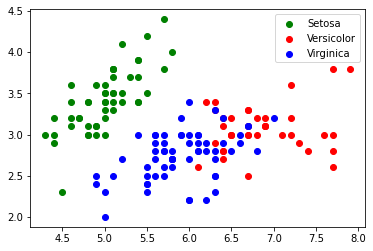

In [50]:
# Gráfico com os agrupamentos (primeiro argumento é o eixo x e o segundo o eixo y)
plt.scatter(iris.data[previsoes == 0,0], iris.data[previsoes == 0,1], c = "green", label = "Setosa")#Plota pontos da Setosa das características na coluna 0 e 1
plt.scatter(iris.data[previsoes == 1,0], iris.data[previsoes == 1,1], c = "red", label = "Versicolor")
plt.scatter(iris.data[previsoes == 2,0], iris.data[previsoes == 2,1], c = "blue", label = "Virginica")
plt.legend()

##### Método Medoids

In [54]:
!pip install pyclustering

     |████████████████████████████████| 2.6 MB 14.1 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=16b3c1ba6dcd6433d5ab05ed6bbe465ff1585278516a6e923687a890fdd87217
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [55]:
from pyclustering.cluster.kmedoids import kmedoids 
from pyclustering.cluster import cluster_visualizer

In [56]:
cluster3 = kmedoids(iris.data[:,0:2], [3,12,20])
cluster3.get_medoids()
cluster3.process()
previsoes = cluster3.get_clusters()
medoides = cluster3.get_medoids()

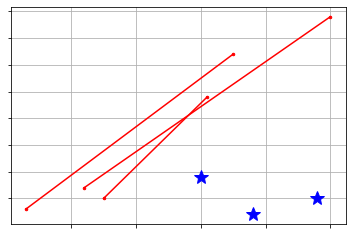

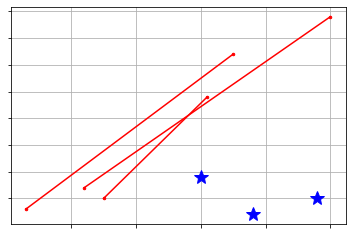

In [57]:
v = cluster_visualizer()
v.append_cluster(previsoes, iris.data[:,0:2])
v.append_cluster(medoides, data = iris.data[:,0:2], marker = '*', markersize = 15)
v.show()